In [42]:
import os
import sys

sys.path.append("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


import torch
import torch.utils.data as Data

import torchvision.transforms as transforms
import torch.optim as optim

import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)


from src.models.LSTM_model import LSTMTagger, DemoDatasetLSTM
from src.utils.utils import prepare_data
%load_ext autoreload
%autoreload 2

[autoreload of src.models.LSTM_model failed: Traceback (most recent call last):
  File "C:\Users\Jakob\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Jakob\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\Jakob\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\Jakob\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..\src\models\LSTM_model.py", line 24, in <module>
    from utils.utils import prepare_data, classification_accuracy, train_test_split, load_combined_dataset
ModuleNotFoundError: No module name

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
raw_data_path = r'..\\data\\raw\\'
processed_data_path = '..\\data\\processed\\'

os.listdir(processed_data_path)

['.gitkeep', 'all_datasets_combined.csv', 'test_alwin.csv']

In [44]:
path = processed_data_path + 'all_datasets_combined.csv'
df_alwin_1 = pd.read_csv(path)#, dtype=np.float64)


true_labels = df_alwin_1['labels'].values.reshape(-1, 1) 
df_alwin_1.drop(['labels'], axis=1, inplace=True)
data = df_alwin_1.values

n_samples, n_features = data.shape
print(n_samples, n_features)

102422 18


In [45]:
unique, counts = np.unique(true_labels, return_counts=True)
dict(zip(unique, counts))

{0.0: 19699,
 1.0: 24251,
 2.0: 51055,
 3.0: 1715,
 4.0: 636,
 5.0: 309,
 6.0: 1568,
 7.0: 1758,
 8.0: 1431}

In [46]:
train_size = 0.7

X_train = data[:int(n_samples * train_size), :]
y_train = true_labels[:int(n_samples * train_size), :]

X_test = data[int(n_samples * train_size):, :]
y_test = true_labels[int(n_samples * train_size):, :]

print("X_train shape is: {}".format(X_train.shape))
print("y_train shape is: {}".format(y_train.shape))
print("X_test shape is: {}".format(X_test.shape))
print("y_test shape is: {}".format(y_test.shape))

X_train shape is: (71695, 18)
y_train shape is: (71695, 1)
X_test shape is: (30727, 18)
y_test shape is: (30727, 1)


In [47]:
seq_length = 30
batch_size = 256
transform = transforms.Compose([transforms.ToTensor()])


# X_train = np.array([[1, 2 ,3],
#                     [3,4,5],
#                     [6,7,8],
#                     [9, 10, 11],
#                     [12,13,14]]).reshape(-1, 3)
                   
# y_train = np.array([1,1,1,1,1]).reshape(-1, 1)

training_dataset = DemoDatasetLSTM(X_train, y_train, 
                                   seq_length, transforms=None)

training_loader = Data.DataLoader(training_dataset, batch_size, 
                                  shuffle=False, drop_last=True,
                                  num_workers=0)


test_dataset = DemoDatasetLSTM(X_test, y_test, 
                               seq_length, transforms=None)

test_loader = Data.DataLoader(test_dataset, batch_size, 
                              shuffle=False, drop_last=True,
                              num_workers=0)

In [48]:
for idx, (data, labels) in enumerate(training_loader):
    neki =1
    #print(data)
#     print(data)
#     print(labels)
#     print(idx)
#     #if idx == 2:
        

In [49]:
num_features = n_features
hidden_size = 32
num_layers = 1

batch_size = 256
num_classes = 9
#seq_len = 4


model = LSTMTagger(num_features, hidden_size, 
                   num_layers, num_classes, 
                   batch_size)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

### Training procedure

In [50]:
losses = []
for epoch in range(10):
    for x, labels in training_loader:
        
        # We need to clear them out before each instance
        optimizer.zero_grad()
        
        # Step 3. Run our forward pass.
        tag_scores, labels_size = model(x)
    
       
        # Labels have to be one dimesional, can check details 
        # in documentation for CrossEntropyLoss, additionaly
        # class index is expected to be in the range [0, C-1]
        # where C is nubmer of classes
        labels = labels[:, -1].view(labels_size).long()
        #labels = (labels * 10).long()

        
        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()

        loss = loss_function(tag_scores, labels)
        losses.append(loss)
        loss.backward()
        optimizer.step()
        #break
        #print(loss)
    print("new epoch")

new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch
new epoch


### Test

In [51]:
predictions_list = []
with torch.set_grad_enabled(False):
    for x_test, labels_test in test_loader:
        tag_scores, _ = model(x_test)
        predictions_list.append(tag_scores.numpy())
#         print(tag_scores.shape)
        
        
        

[autoreload of src.models.LSTM_model failed: Traceback (most recent call last):
  File "C:\Users\Jakob\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Jakob\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 434, in superreload
    module = reload(module)
  File "C:\Users\Jakob\Anaconda3\lib\imp.py", line 315, in reload
    return importlib.reload(module)
  File "C:\Users\Jakob\Anaconda3\lib\importlib\__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..\src\models\LSTM_model.py", line 24, in <module>
    from utils.utils import prepare_data, classification_accuracy, train_test_split, load_combined_dataset
ModuleNotFoundError: No module name

In [12]:
prediction = np.vstack(predictions_list)

In [13]:
prediction.shape

(30464, 9)

In [25]:
predicted_labels = np.argmax(prediction, axis = 1)
predicted_labels = np.pad(predicted_labels, (0, 263), 
                          'constant',constant_values=(0,0))
predicted_labels = predicted_labels.reshape(-1, 1)

In [26]:
print(predicted_labels[0:10])
predicted_labels.shape

[[2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


(30727, 1)

In [27]:

print(y_test[0:10])
y_test.shape

[[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


(30727, 1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_labels)

0.7056985712890943

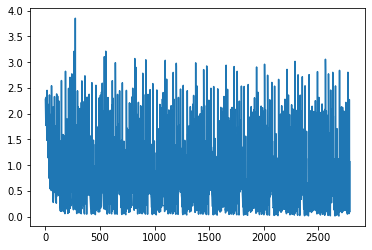

In [20]:
plt.plot(losses)

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(predicted_labels, return_counts=True)
dict(zip(unique, counts))